NAME : KEVIN ADITYA PRATAMA

STUDENT ID : 1101220014

In [83]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import os
import matplotlib.pyplot as plt

In [85]:
def compute_magnitude(df):
    return np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

In [87]:
def butter_filter(data, cutoff, fs, filter_type='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=filter_type, analog=False)
    return filtfilt(b, a, data)

In [89]:
def extract_features(df, window_size=52, overlap=26):
    features = []
    for i in range(0, len(df) - window_size, overlap):
        window = df[i:i+window_size]
        
        feature = []
        for axis in ['x', 'y', 'z', 'm']:
            axis_data = window[axis].values
            feature.append(np.mean(axis_data))
            feature.append(np.std(axis_data))
            feature.append(np.max(axis_data) - np.min(axis_data))
            feature.append(np.sqrt(np.mean(np.square(axis_data))))
        
        magnitude = compute_magnitude(window)
        feature.append(np.mean(magnitude))
        feature.append(np.std(magnitude))
        feature.append(np.max(magnitude) - np.min(magnitude))
        feature.append(np.sqrt(np.mean(np.square(magnitude))))
        
        features.append(feature)
    
    return np.array(features)

In [91]:
def load_files(files):
    data_frames = []
    for file in files:
        if os.path.exists(file):
            df = pd.read_csv(file)
            data_frames.append(df)
        else:
            print(f"File not found: {file}")
    return data_frames

In [93]:
def save_features_by_label(features, labels, output_path='output/'):
    os.makedirs(output_path, exist_ok=True)
    for label in np.unique(labels):
        label_features = features[labels == label]
        output_file = os.path.join(output_path, f'label_{label}.csv')
        np.savetxt(output_file, label_features, delimiter=',', header='mean_x, std_x, minmax_x, rms_x, mean_y, std_y, minmax_y, rms_y, mean_z, std_z, minmax_z, rms_z, mean_m, std_m, minmax_m, rms_m', comments='')
        print(f"Saved features for label {label} to {output_file}")

In [95]:
data_frames = []
files = [
    'C:/Users/ASUS ROG/Downloads/hw7/1.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/2.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/3.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/4.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/5.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/6.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/7.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/8.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/9.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/10.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/11.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/12.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/13.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/14.csv',
    'C:/Users/ASUS ROG/Downloads/hw7/15.csv',
]


Saved features for label 1 to output/label_1.csv


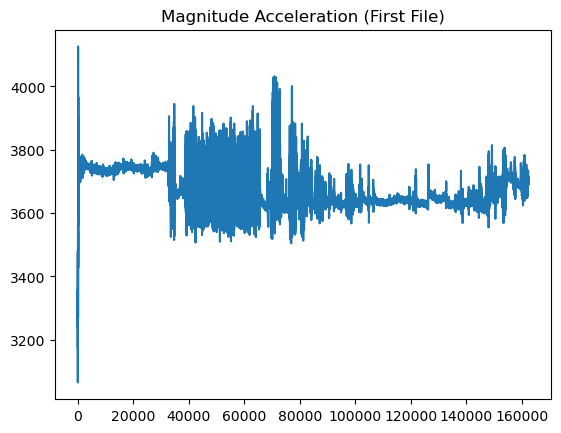

In [99]:
data_frames = load_files(files)

# Memproses data untuk masing-masing file
all_features = []
all_labels = []

for df in data_frames:
    # Menetapkan nama kolom
    df.columns = ['timestamp', 'x', 'y', 'z', 'label']
    
    # Menambahkan kolom magnitude
    df['m'] = compute_magnitude(df)
    
    # Filter data dengan low-pass dan high-pass
    fs = 52  # Frekuensi sampling
    cutoff = 1  # Frekuensi cut-off untuk filter
    df['x_low'] = butter_filter(df['x'], cutoff, fs, 'low')
    df['x_high'] = butter_filter(df['x'], cutoff, fs, 'high')
    
    # Ekstraksi fitur
    features = extract_features(df)
    all_features.append(features)
    all_labels.append(df['label'].values[:len(features)])  # Mengambil label yang sesuai dengan jumlah fitur

# Menggabungkan semua fitur dan label
all_features = np.vstack(all_features)
all_labels = np.hstack(all_labels)

# Menyimpan hasil fitur berdasarkan label
save_features_by_label(all_features, all_labels)

# Visualisasi contoh magnitude dari file pertama
if data_frames:
    plt.plot(data_frames[0]['m'])
    plt.title('Magnitude Acceleration (First File)')
    plt.show()